## EDA for the Student data

In this experiment we will try to formulate a model using classsification algorithms to predict if a student will dropout or complete the course.

We will use confusion matrix and try to get to a repectable f1 score for this.
For this problem in my opinion `recall` should be favoured over `precision`. As we don't want to miss out on students who might drop out in future. And even if we classify a student as false positive it might not have much significance as classifying a student as false negative.



## Data Source

https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Attributes

Number of Attributes = 36


## Reading the file

In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
df= pd.read_csv('..\data\data.csv',delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [93]:
pd.options.display.max_columns=50
pd.options.display.max_rows=100
pd.options.display.max_info_rows=100
pd.options.display.max_dir_items=100

In [76]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   Marital status                                  int64  
 1   Application mode                                int64  
 2   Application order                               int64  
 3   Course                                          int64  
 4   Daytime/evening attendance	                     int64  
 5   Previous qualification                          int64  
 6   Previous qualification (grade)                  float64
 7   Nacionality                                     int64  
 8   Mother's qualification                          int64  
 9   Father's qualification                          int64  
 10  Mother's occupation                             int64  
 11  Father's occupation                             int64  
 12  Admission grade                   

In [78]:
for col in df.columns:
    print(col)
    print(df[col].unique().sum())
    print(df[col].unique()[:5])
    print("")

Marital status
21
[1 2 4 3 5]

Application mode
473
[17 15  1 39 18]

Application order
30
[5 1 2 4 3]

Course
139607
[ 171 9254 9070 9773 8014]

Daytime/evening attendance	
1
[1 0]

Previous qualification
302
[ 1 19 42 39 10]

Previous qualification (grade)
14011.300000000001
[122.  160.  100.  133.1 142. ]

Nacionality
943
[ 1 62  6 41 26]

Mother's qualification
677
[19  1 37 38  3]

Father's qualification
799
[12  3 37 38  1]

Mother's occupation
3184
[5 3 9 7 4]

Father's occupation
5172
[ 9  3  7 10  5]

Admission grade
81891.5
[127.3 142.5 124.8 119.6 141.5]

Displaced
1
[1 0]

Educational special needs
1
[0 1]

Debtor
1
[0 1]

Tuition fees up to date
1
[1 0]

Gender
1
[1 0]

Scholarship holder
1
[0 1]

Age at enrollment
1831
[20 19 45 50 18]

International
1
[0 1]

Curricular units 1st sem (credited)
210
[0 2 3 6 7]

Curricular units 1st sem (enrolled)
260
[0 6 5 7 8]

Curricular units 1st sem (evaluations)
612
[ 0  6  8  9 10]

Curricular units 1st sem (approved)
257
[0 6 5 7 

In [95]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Lets Drop the Target = Enrolled rows as it might not be needed

In [96]:
df = df[df['Target']!='Enrolled']
df['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

<Axes: xlabel='Marital status', ylabel='Target'>

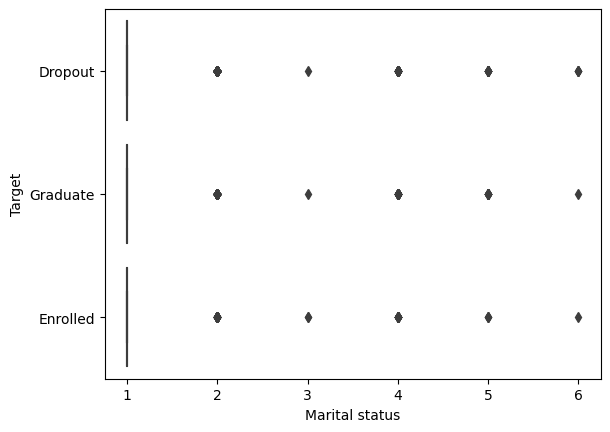

In [86]:
sns.boxplot(x='Marital status', y='Target', data=df)


From this Grapgh we cant make out much so we will plot a countplot

<Axes: xlabel='Marital status', ylabel='count'>

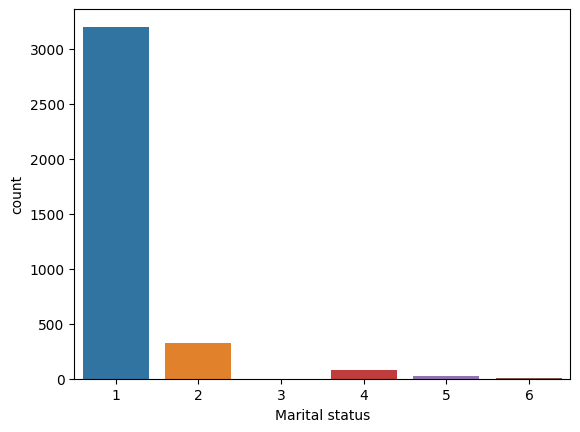

In [97]:
sns.countplot(x='Marital status', data=df)

in this we see the various marital status values
1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated 

<Axes: xlabel='Marital status', ylabel='count'>

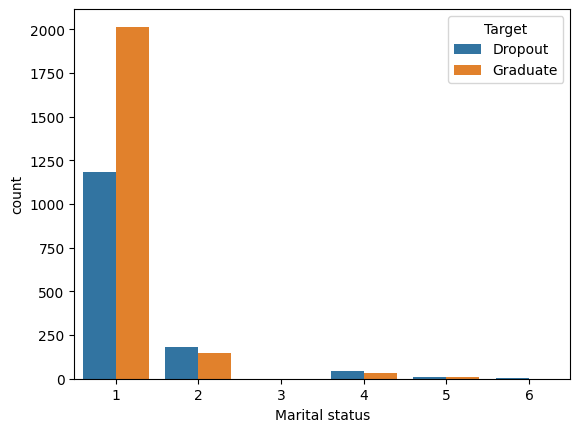

In [98]:
sns.countplot(x='Marital status', hue='Target', data=df)

In this graph we see that for single students Graduate ratio is high and for other marital categories the dropout ratio seems to be higher


<Axes: xlabel='Marital status', ylabel='count'>

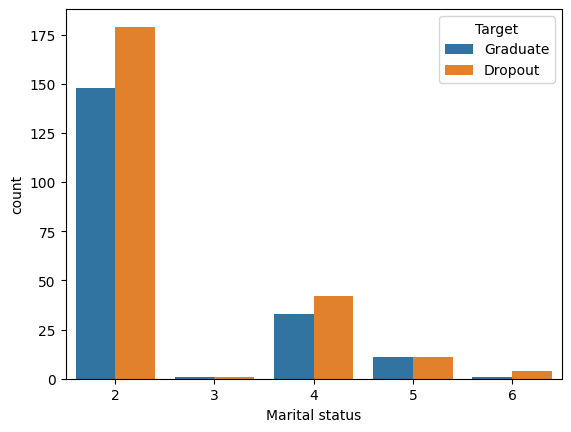

In [99]:
sns.countplot(x='Marital status', hue='Target', data = df[df['Marital status'] != 1])

<Axes: xlabel='Marital status', ylabel='count'>

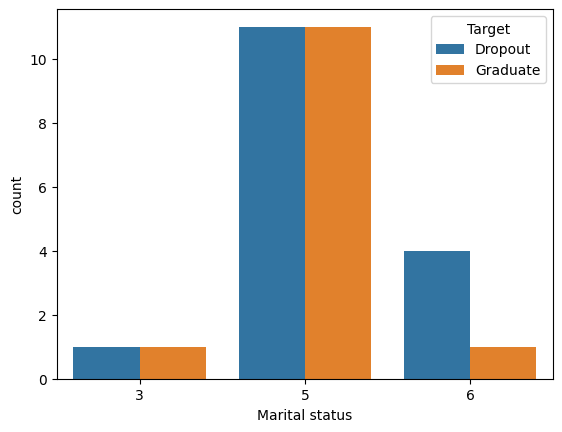

In [102]:
sns.countplot(x='Marital status', hue='Target', data =df[df['Marital status'].isin([3,5,6])])

TypeError: Horizontal orientation requires numeric `x` variable.

Gender
0    2381
1    1249
Name: count, dtype: int64
